In [1]:
from utils import *
# import matplotlib as mpl

# Set the default color cycle
# mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=["red", "blue", "green"]) 

In [2]:
def plot_gpr_samples(gpr_model, n_samples, ax):
    """Plot samples drawn from the Gaussian process model.

    If the Gaussian process model is not trained then the drawn samples are
    drawn from the prior distribution. Otherwise, the samples are drawn from
    the posterior distribution. Be aware that a sample here corresponds to a
    function.

    Parameters
    ----------
    gpr_model : `GaussianProcessRegressor`
        A :class:`~sklearn.gaussian_process.GaussianProcessRegressor` model.
    n_samples : int
        The number of samples to draw from the Gaussian process distribution.
    ax : matplotlib axis
        The matplotlib axis where to plot the samples.
    """
    x = np.linspace(0, 5, 100)
    X = x.reshape(-1, 1)

    y_mean, y_std = gpr_model.predict(X, return_std=True)
    y_samples = gpr_model.sample_y(X, n_samples)

    for idx, single_prior in enumerate(y_samples.T):
        ax.plot(
            x,
            single_prior,
            linestyle="--",
            alpha=0.5,
            label=f"Sampled function #{idx + 1}",
        )
    ax.plot(x, y_mean, color="black", label="Mean")
    ax.fill_between(
        x,
        y_mean - y_std,
        y_mean + y_std,
        alpha=0.1,
        color="black",
        label=r"$\pm$ 1 std. dev.",
    )
    # ax.set_xlabel("x")
    # ax.set_ylabel("y")
    ax.set_ylim([-3, 3])

In [3]:
rng = np.random.RandomState(18734)
X_train = rng.uniform(0, 5, 10).reshape(-1, 1)
y_train = 2*np.sin((X_train[:, 0] - 2.5) ** 2)
n_samples = 3

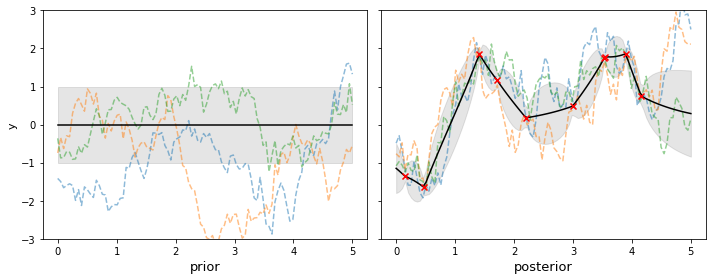

In [11]:
kernel = 1.0 * Matern(nu=0.5, length_scale=1.0, length_scale_bounds=(1e-1, 10.0))
gpr = GPR(kernel=kernel, random_state=0)

fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(10, 4))
axs = axs.ravel()
# plot prior
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[0])
# axs[0].set_title("Samples from prior distribution")
axs[0].set_xlabel(r'prior', fontsize=13)
axs[0].set_ylabel('y', fontsize=11)

# plot posterior
gpr.fit(X_train, y_train)
plot_gpr_samples(gpr, n_samples=n_samples, ax=axs[1])
axs[1].scatter(X_train[:, 0], y_train, color="red",marker='x', zorder=10, label="Observations")
# axs[1].legend(bbox_to_anchor=(1.05, 1.5), loc="upper left")
# axs[1].set_title("Samples from posterior distribution")
axs[1].set_xlabel(r'posterior', fontsize=13)

# fig.suptitle("Radial Basis Function kernel", fontsize=18)
# fig.supylabel('y')
plt.tight_layout()
plt.savefig('./sample.png', dpi=150, transparent=False, bbox_inches='tight')